In [3]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = []
with open('t2', 'r') as f:
    for line in f:
        data.append(line.replace('\n','').split('\t')[1:])

In [23]:
with open("memtris.csv", "wt") as fp:
    writer = csv.writer(fp, delimiter=",")
    writer.writerow(['user_id','game_id','round','compactor','win','game_mode'])  # write header
    writer.writerows(data)

In [1]:
games = pd.read_csv('memtris.csv')

NameError: name 'pd' is not defined

<AxesSubplot:xlabel='round', ylabel='count'>

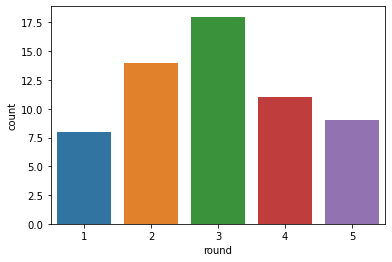

In [27]:
sns.countplot(x=games['round'])

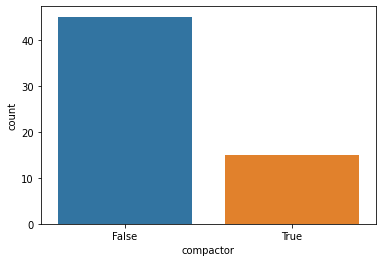

In [28]:
sns.countplot(x=games['compactor']);

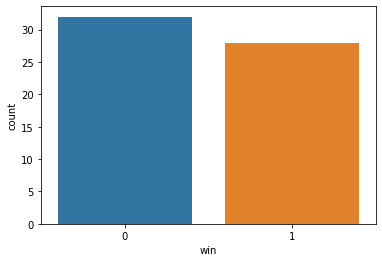

In [29]:
sns.countplot(x=games['win']);

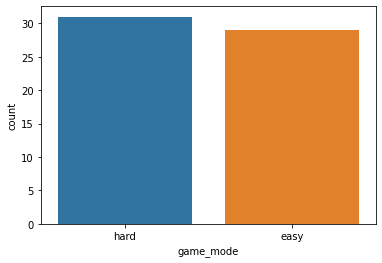

In [30]:
sns.countplot(x=games['game_mode']);

In [62]:
games_compactor_on = games[games['compactor'] == True]
games_compactor_off = games[games['compactor'] == False]

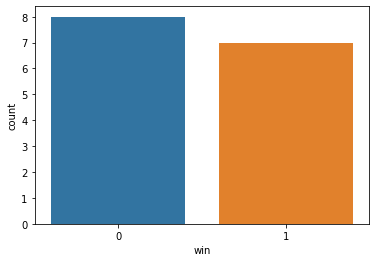

In [37]:
# Игры с уплотнителем:
sns.countplot(x=games_compactor_on['win']);

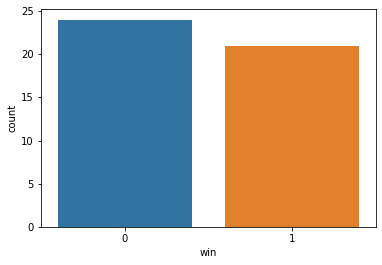

In [39]:
# Игры без уплотнителя:
sns.countplot(x=games_compactor_off['win']);

In [40]:
def get_wins_percent(data):
    return int(round(data['win'].mean() * 100))

print('Выигрышей с уплотнителем:', get_wins_percent(games_compactor_on), '%')
print('Выигрышей без уплотнителя:', get_wins_percent(games_compactor_off), '%')

Выигрышей с уплотнителем: 47 %
Выигрышей без уплотнителя: 47 %


In [63]:
for game_round in [1, 2, 3, 4, 5]:
    print('Round', game_round)
    print('Выигрышей с уплотнителем:', 
          get_wins_percent(games_compactor_on[games_compactor_on['round'] == game_round]),
          '%')
    print('Выигрышей без уплотнителя:',
          get_wins_percent(games_compactor_off[games_compactor_off['round'] == game_round]),
          '%')
    print()

Round 1
Выигрышей с уплотнителем: 100 %
Выигрышей без уплотнителя: 67 %

Round 2
Выигрышей с уплотнителем: 0 %
Выигрышей без уплотнителя: 54 %

Round 3
Выигрышей с уплотнителем: 67 %
Выигрышей без уплотнителя: 25 %

Round 4
Выигрышей с уплотнителем: 50 %
Выигрышей без уплотнителя: 67 %

Round 5
Выигрышей с уплотнителем: 0 %
Выигрышей без уплотнителя: 20 %



In [64]:
for game_mode in ['hard', 'easy']:
    print('Mode', game_mode)
    print('Доля выигрышей с уплотнителем:',
          get_wins_percent(games_compactor_on[games_compactor_on['game_mode'] == game_mode]),
          '%')
    print('Доля выигрышей без уплотнителя:',
          get_wins_percent(games_compactor_off[games_compactor_off['game_mode'] == game_mode]),
          '%')
    print()

Mode hard
Доля выигрышей с уплотнителем: 38 %
Доля выигрышей без уплотнителя: 35 %

Mode easy
Доля выигрышей с уплотнителем: 57 %
Доля выигрышей без уплотнителя: 59 %



<AxesSubplot:>

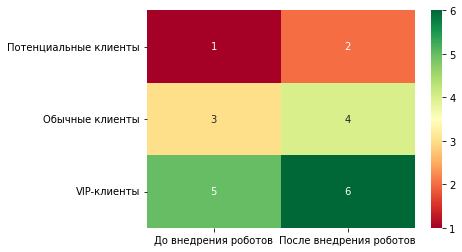

In [4]:
segments_old = ['Segment 0', 'Segment 1', 'Segment 2']
segments_new = ['Потенциальные клиенты', 'Обычные клиенты', 'VIP-клиенты']
intervals = ['До внедрения роботов', 'После внедрения роботов']

# вымышленные значения
mean_scores = [[1, 2],
               [3, 4],
               [5, 6]]

# настраиваем и строим хитмэп
sns.heatmap(mean_scores, xticklabels=intervals, yticklabels=segments_new, annot=True, cmap='RdYlGn') 